In [93]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path 


plt.rcParams['font.family'] = 'serif'  # Шрифт
plt.rcParams['font.size'] = 12                  # Размер шрифта
plt.rcParams['axes.titlesize'] = 14             # Размер заголовка
plt.rcParams['axes.labelsize'] = 12             # Размер подписей осей

base_dir = Path("graphs")
subdirs = ["1", "2", "3", "4"]

base_dir.mkdir(exist_ok=True)
for subdir in subdirs:
    (base_dir / subdir).mkdir(exist_ok=True)

data_1 = np.loadtxt('1.txt')
data_2 = np.loadtxt('2.txt')
data_3 = np.loadtxt('3.txt')
data_4 = np.loadtxt('4.txt')

# Строим входную характеристику $I_б = f(U_{бэ})$, при заданном $U_{кэ}$

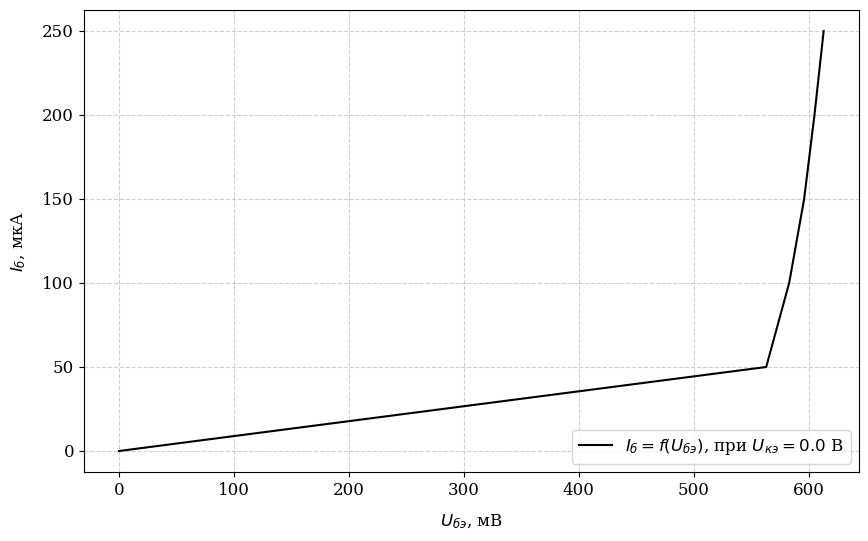

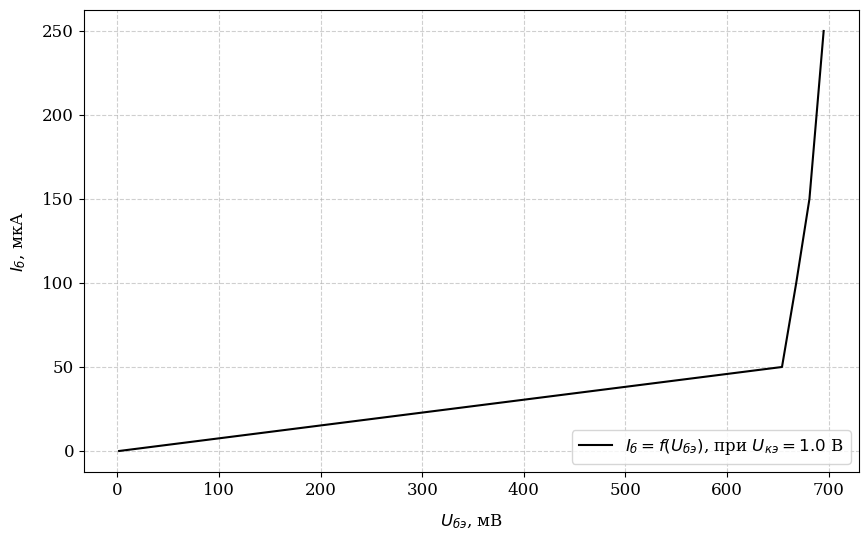

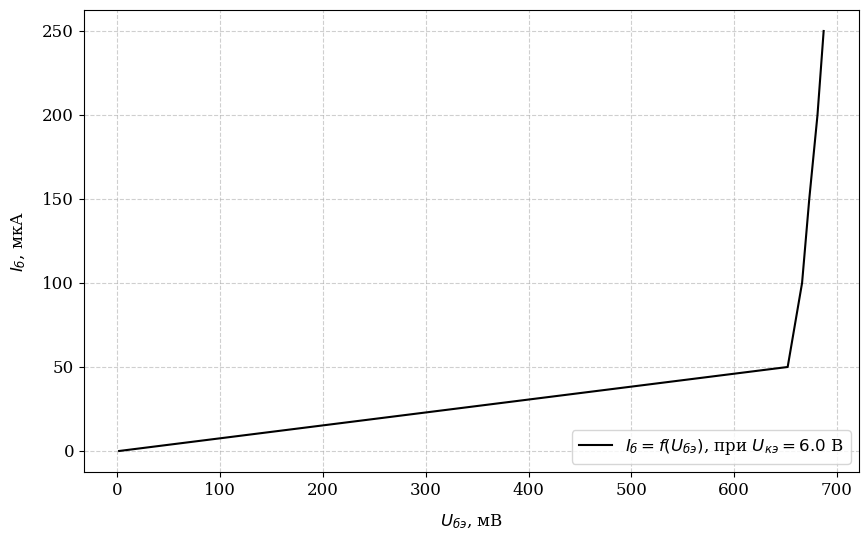

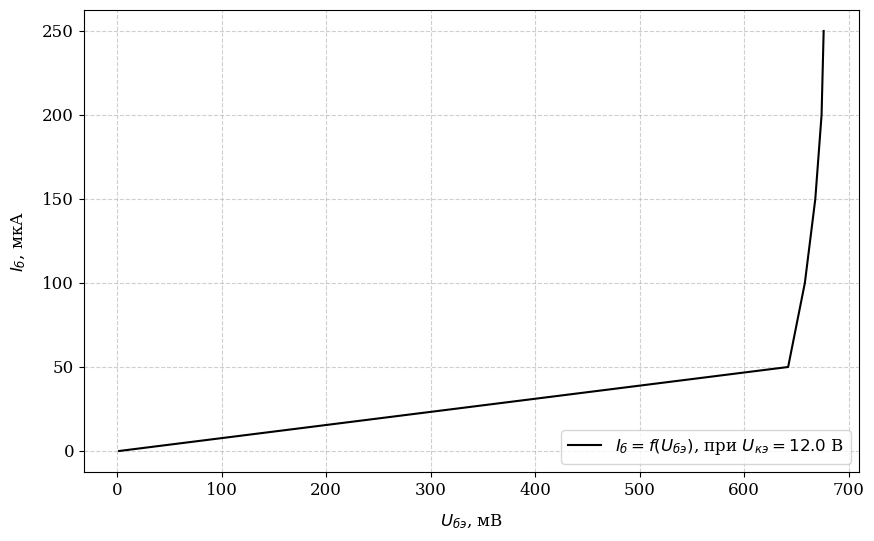

In [94]:
I_b = data_1[0, 1:]
U_ke = data_1[1:, 0]
for i, row in enumerate(data_1[1:]):
    U_be = row[1:]
    plt.figure(figsize=(10, 6))
    plt.grid(True,
            linestyle='--',
            alpha=0.6)
    plt.xlabel(r"$U_{бэ}$, мВ", labelpad=10)
    plt.ylabel(r"$I_{б}$, мкА", labelpad=10)
    plt.plot(U_be, I_b,
            linewidth=1.5,
            color='black',
            linestyle='-',
            label=f"$I_{{б}} = f(U_{{бэ}})$, при $U_{{кэ}} = {U_ke[i]}$ В")
    plt.legend(loc='lower right', frameon=True)
    plt.savefig(f"graphs/1/Входная_характеристика_{i+1}_{U_ke[i]}.svg", bbox_inches='tight' ,dpi=300)

# Строим выходную характеристику $I_к = f(U_{кэ})$, при заданном $I_б$

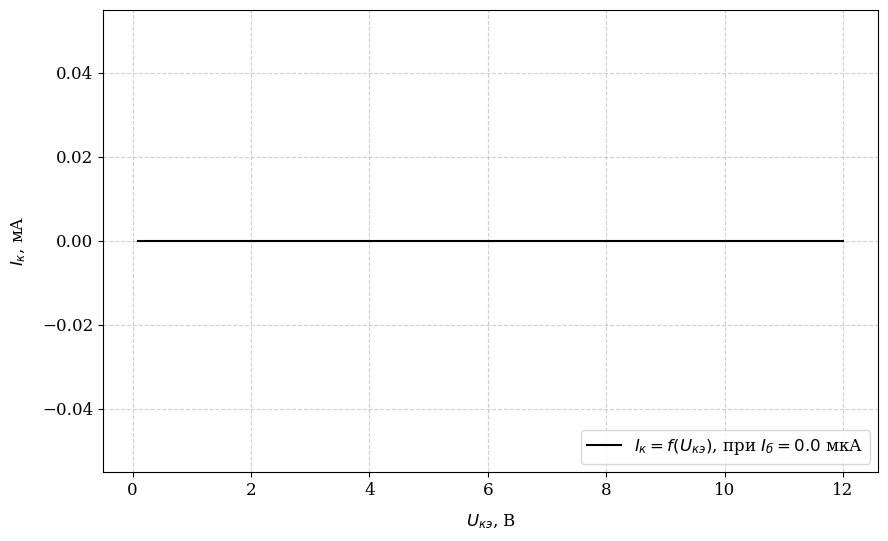

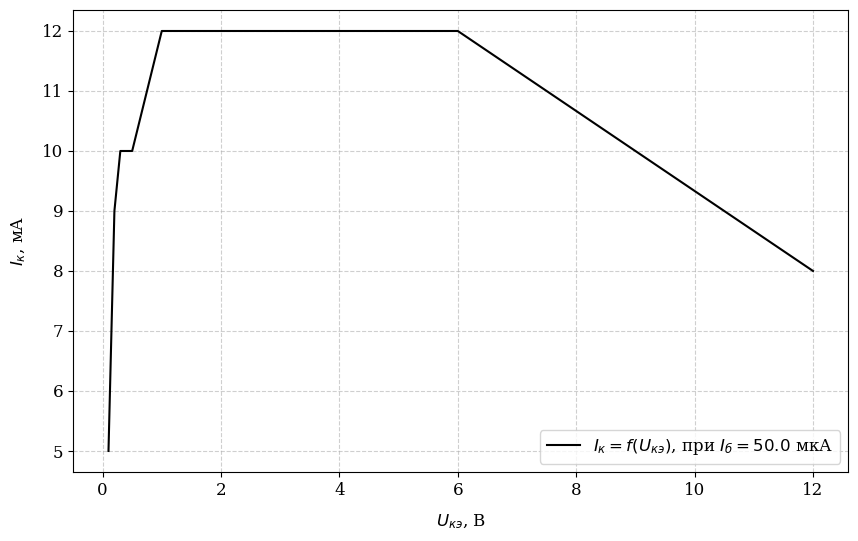

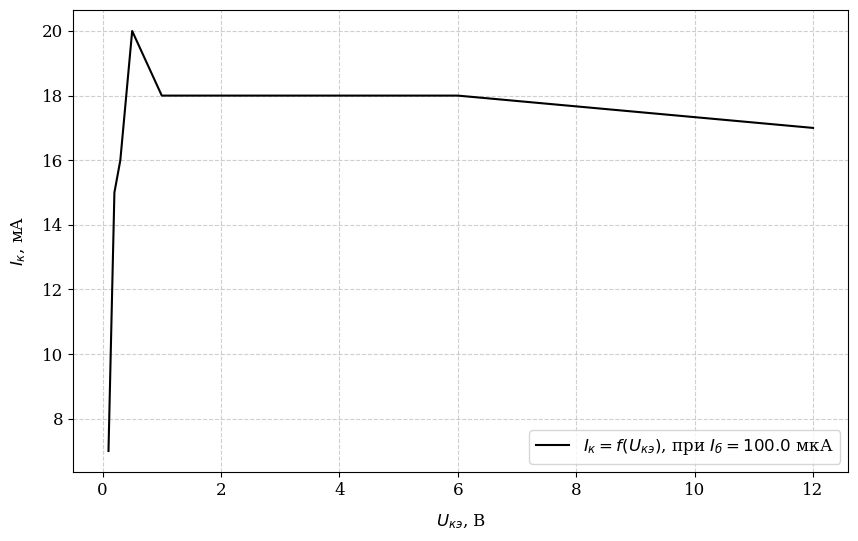

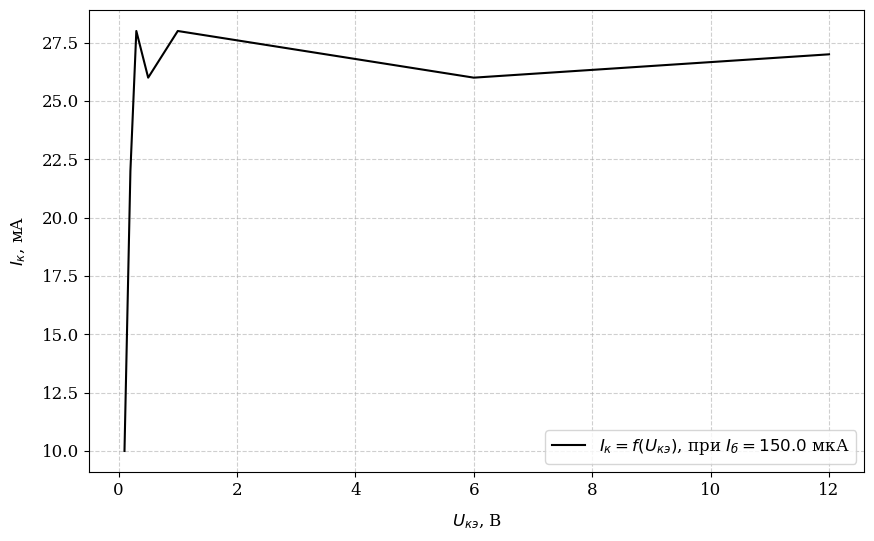

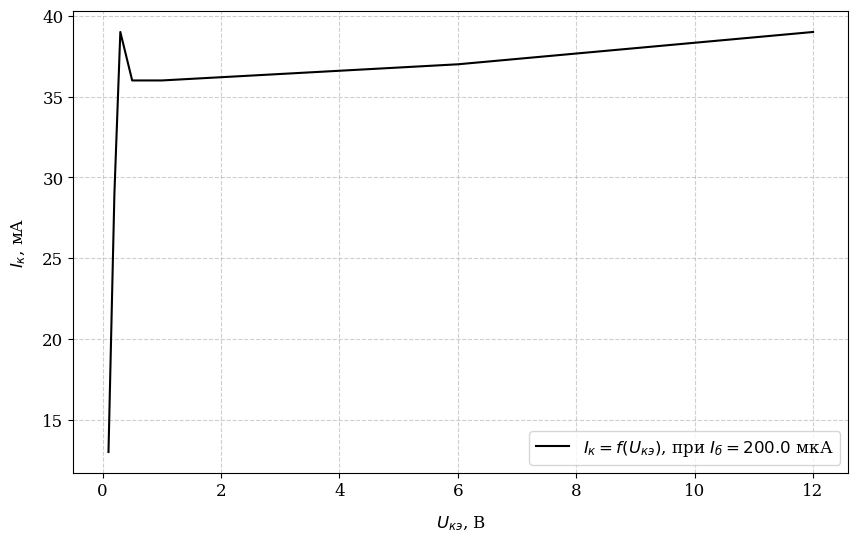

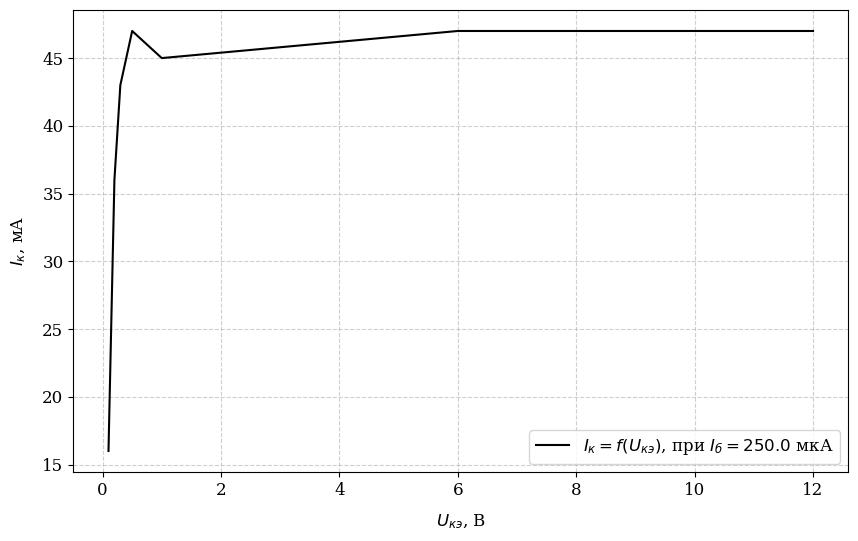

In [95]:
U_ke = data_2[1:, 0]
for i, col in enumerate(data_2.T[1:]):
    I_b = col[0]
    I_k = col[1:]
    plt.figure(figsize=(10, 6))
    plt.grid(True,
            linestyle='--',
            alpha=0.6)
    plt.xlabel(r"$U_{кэ}$, В", labelpad=10)
    plt.ylabel(r"$I_{к}$, мА", labelpad=10)
    plt.plot(U_ke, I_k,
            linewidth=1.5,
            color='black',
            linestyle='-',
            label=f"$I_{{к}} = f(U_{{кэ}})$, при $I_б = {I_b}$ мкА")
    plt.legend(loc='lower right', frameon=True)
    plt.savefig(f"graphs/2/Выходная_характеристика_{i+1}_{I_b}.svg", bbox_inches='tight' ,dpi=300)

# Построение стокозатворной характеристики биполярного транзистора

$$I_с = f(U_{зи})$$

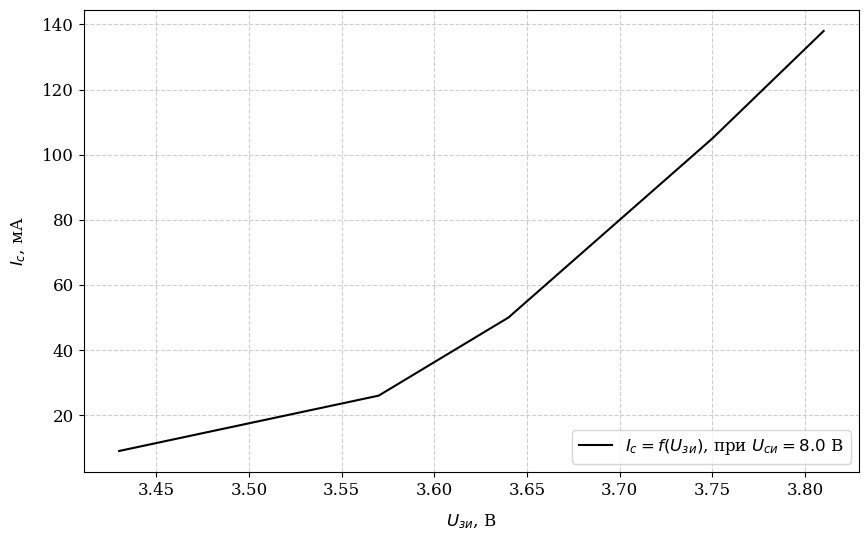

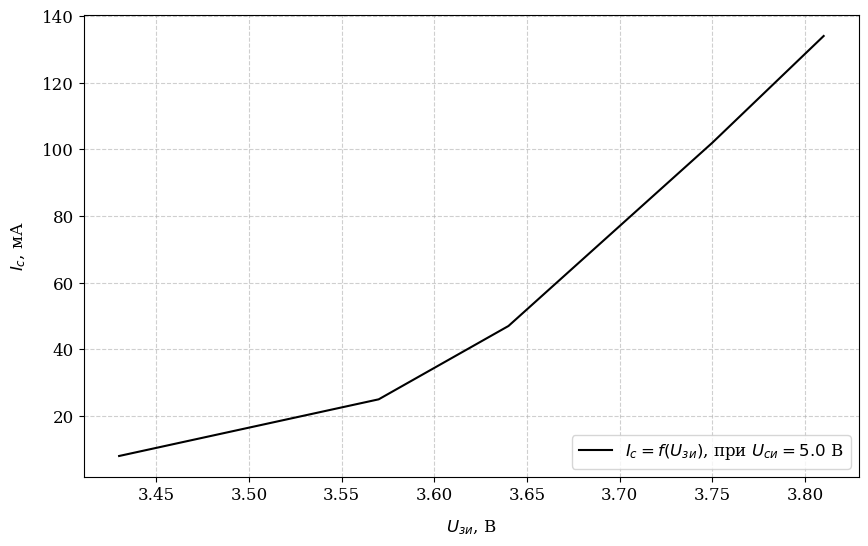

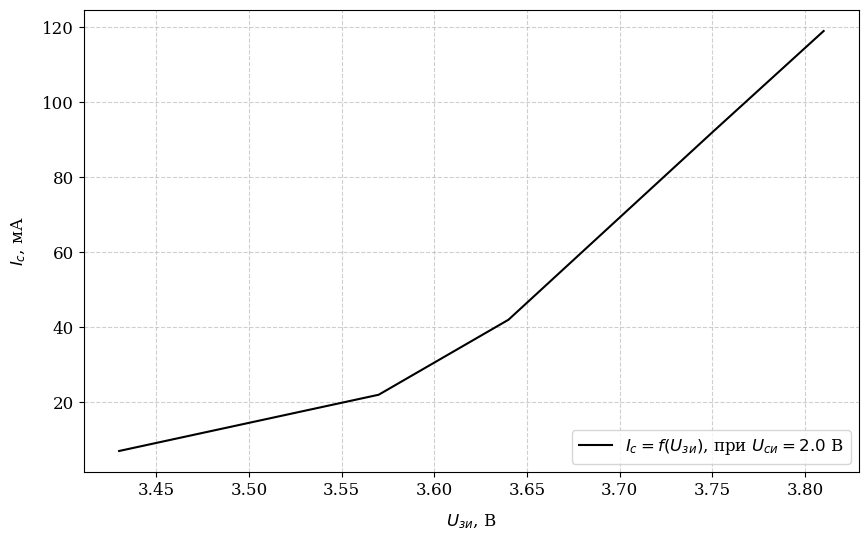

In [96]:
U_zi = data_3[1:, 0]
mask = np.array([col[0] in {2, 5, 8} for col in data_3.T])
for i, col_data in enumerate(data_3[:, mask].T):
    U_si = col_data[0]
    I_c = col_data[1:]
    plt.figure(figsize=(10, 6))
    plt.grid(True,
            linestyle='--',
            alpha=0.6)
    plt.xlabel(r"$U_{зи}$, В", labelpad=10)
    plt.ylabel(r"$I_{с}$, мА", labelpad=10)
    plt.plot(U_zi, I_c,
            linewidth=1.5,
            color='black',
            linestyle='-',
            label=f"$I_{{с}} = f(U_{{зи}})$, при $U_{{си}} = {U_si}$ В")
    plt.legend(loc='lower right', frameon=True)
    plt.savefig(f"graphs/3/Стокозатворная_характеристика_{i+1}_{U_si}.svg", bbox_inches='tight' ,dpi=300)

# Построение выходной характеристики биполярного транзистора

$$I_с = f(U_{си})$$

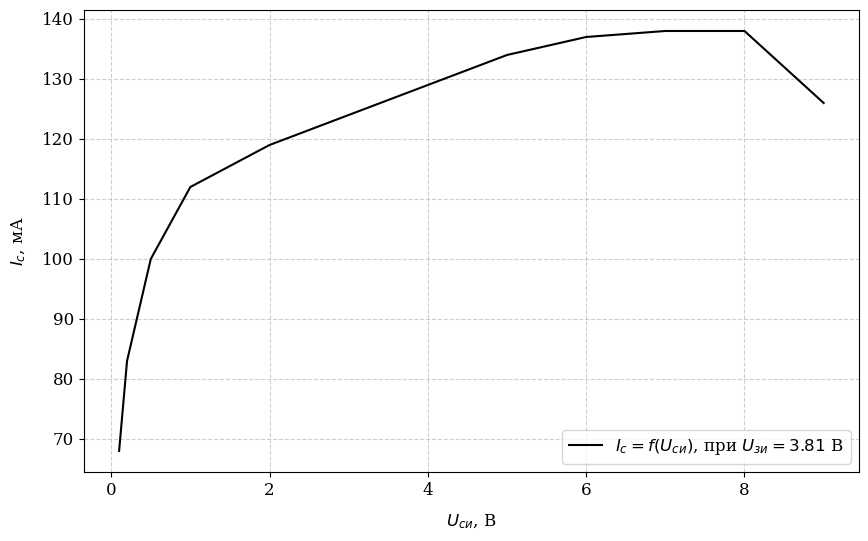

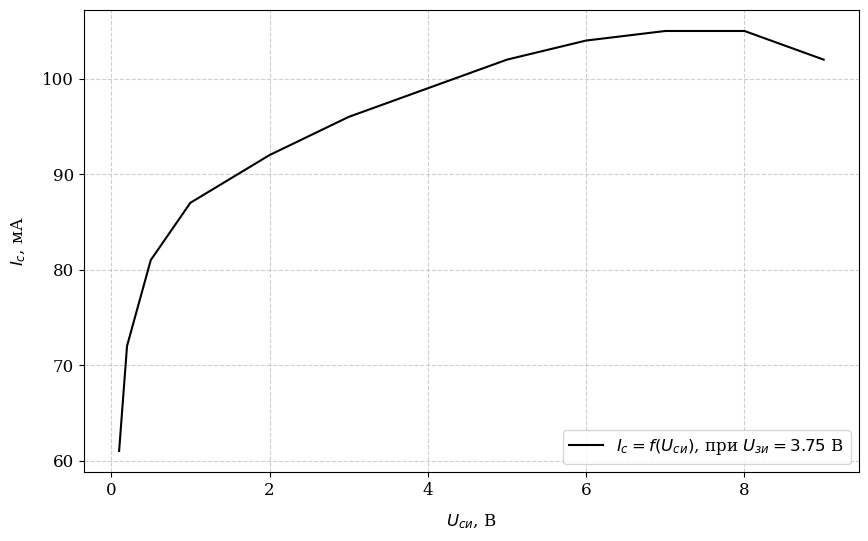

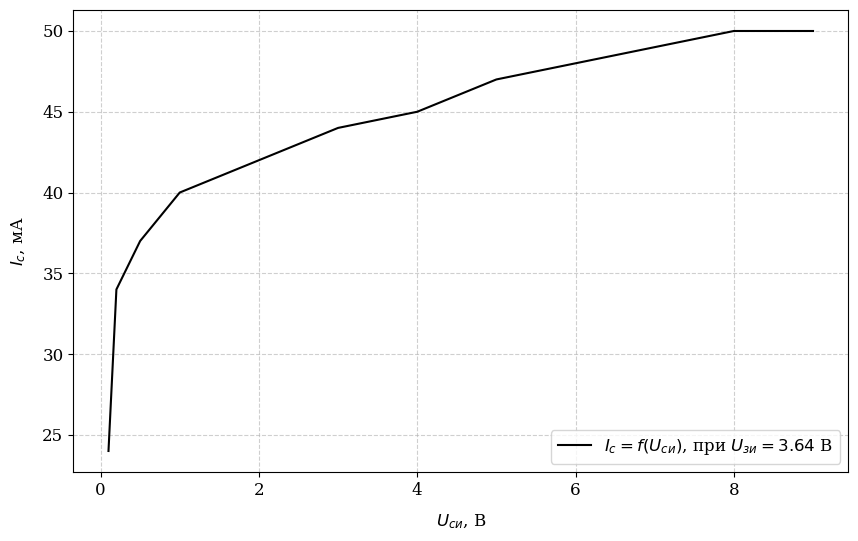

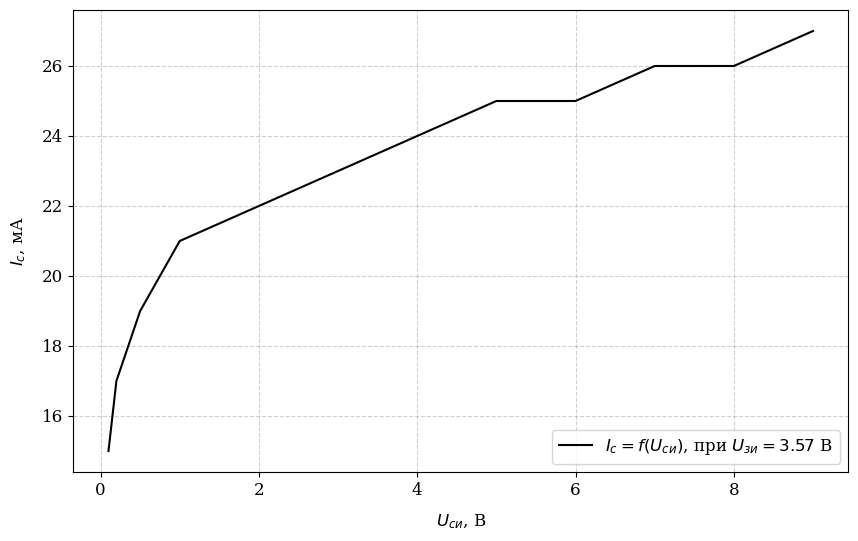

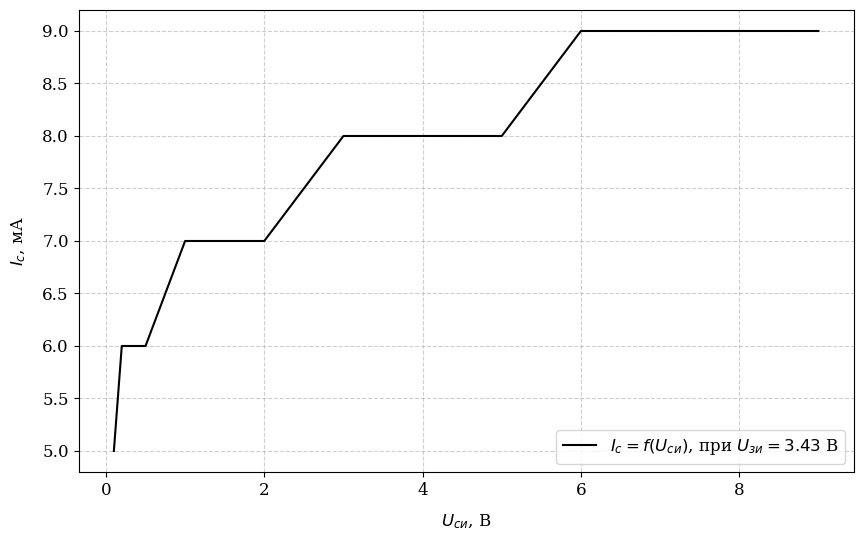

In [97]:
U_zi = data_3[1:, 0]
U_si = data_3[0, 1:]
for i, I_c in enumerate(data_3[1:, 1:]):
    plt.figure(figsize=(10, 6))
    plt.grid(True,
            linestyle='--',
            alpha=0.6)
    plt.xlabel(r"$U_{си}$, В", labelpad=10)
    plt.ylabel(r"$I_{с}$, мА", labelpad=10)
    plt.plot(U_si, I_c,
            linewidth=1.5,
            color='black',
            linestyle='-',
            label=f"$I_{{с}} = f(U_{{си}})$, при $U_{{зи}} = {U_zi[i]}$ В")
    plt.legend(loc='lower right', frameon=True)
    plt.savefig(f"graphs/4/Выходная_характеристика_{i+1}_{U_zi[i]}.svg", bbox_inches='tight' ,dpi=300)